# Data Transformation with Pandas

Pandas is a popular Python package for data transformation. It is open source (BSD-licensed). It provides efficient, easy-to-use data transformation and analusis tools. In the following section, we will show you how to use Pandas to transform and analyze tabular data.  

------------------------------------------------------------------------------  

We import numpy and pandas as follows, we assign alias of packages after the term "as" so we don't need to type in the full name of the package every time we use it  

In [1]:
import numpy as np
import pandas as pd

## Loading Datasets with Pandas

With Pandas, we can read tables of different format (csv. json, parquet, ...)  
  
In our case, we are reading a table in csv. The table "Papers" is a part of the Microsoft Academic Graph. The table includes publication information, such as title, publish year, publisher, ...  

In [2]:
Papers = pd.read_csv('~/datasets/s4/MAG/Papers.csv')

By calling:   
```python
Papers.head()
```
we can view the first five lines of the datast

## Brief Overview of the Data

In [3]:
Papers.head()

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,OnlineDate,...,ConferenceSeriedId,ConferenceInstanceId,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue
0,51264158,27169,NaN,NaN,no has visto nada en treblinka,No has visto nada en Treblinka,NaN,2009,2009-01-01 00:00:00,NaN,...,NaN,NaN,NaN,26.0,73,NaN,0,0,0,Cahiers du cinéma: España
1,93781424,22616,NaN,Journal,reading minds how infants come to understand o...,Reading Minds: How Infants Come to Understand ...,NaN,2009,2009-11-01 00:00:00,NaN,...,NaN,NaN,30.0,2.0,28,32,0,6,6,Zero to Three
2,138145309,22947,NaN,Patent,weight measuring device for cooking appliance,Weight measuring device for cooking appliance,NaN,1996,1996-09-25 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,6,6,NaN
3,214118367,21825,10.1007/BF00324200,Journal,effect of oxygen segregation on the surface st...,Effect of oxygen segregation on the surface st...,NaN,1992,1992-04-01 00:00:00,NaN,...,NaN,NaN,54.0,4.0,350,354,22,25,25,Applied Physics A
4,267808649,22391,NaN,NaN,is mars sample return required prior to sendin...,Is Mars Sample Return Required Prior to Sendin...,NaN,2012,2012-05-22 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2,NaN


By calling:   
```python
Papers.tail()
```
we can view the last five lines of the datast

In [4]:
Papers.tail()

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,OnlineDate,...,ConferenceSeriedId,ConferenceInstanceId,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue
121523,3021802473,18475,NaN,Book,the human equation,The human equation,NaN,1998,1998-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,541,857,NaN
121524,3047811908,21782,10.1525/9780520936942,NaN,geology of the sierra nevada revised edition,Geology of the Sierra Nevada: Revised Edition,NaN,2006,2006-05-15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,4,4,NaN
121525,3103850923,21618,10.1063/1.4867509,Repository,raman spectra and magnetization of all ferroma...,Raman spectra and Magnetization of all-ferroma...,NaN,2014,2014-02-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,9,9,arXiv: Materials Science
121526,3108124974,19215,NaN,Patent,growth hormone secretagogues,Growth hormone secretagogues,NaN,1996,1996-12-04,NaN,...,NaN,NaN,2.0,12.0,1302,1312,28,238,370,IDrugs : the investigational drugs journal
121527,3122705141,16122,10.1162/003355399555954,Journal,why do some countries produce so much more out...,Why do Some Countries Produce So Much More Out...,NaN,1999,1999-02-01,1999-06-01,...,NaN,NaN,114.0,1.0,83,116,47,6189,10477,Quarterly Journal of Economics


We can also assign the number of lines we want to view:

In [5]:
Papers.head(10)

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,OnlineDate,...,ConferenceSeriedId,ConferenceInstanceId,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue
0,51264158,27169,NaN,NaN,no has visto nada en treblinka,No has visto nada en Treblinka,NaN,2009,2009-01-01 00:00:00,NaN,...,NaN,NaN,NaN,26.0,73,NaN,0,0,0,Cahiers du cinéma: España
1,93781424,22616,NaN,Journal,reading minds how infants come to understand o...,Reading Minds: How Infants Come to Understand ...,NaN,2009,2009-11-01 00:00:00,NaN,...,NaN,NaN,30.0,2.0,28,32,0,6,6,Zero to Three
2,138145309,22947,NaN,Patent,weight measuring device for cooking appliance,Weight measuring device for cooking appliance,NaN,1996,1996-09-25 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,6,6,NaN
3,214118367,21825,10.1007/BF00324200,Journal,effect of oxygen segregation on the surface st...,Effect of oxygen segregation on the surface st...,NaN,1992,1992-04-01 00:00:00,NaN,...,NaN,NaN,54.0,4.0,350,354,22,25,25,Applied Physics A
4,267808649,22391,NaN,NaN,is mars sample return required prior to sendin...,Is Mars Sample Return Required Prior to Sendin...,NaN,2012,2012-05-22 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2,NaN
5,327619807,24414,10.1016/B978-0-08-097086-8.31087-X,BookChapter,fertility transition latin america and the car...,Fertility Transition: Latin America and the Ca...,NaN,2015,2015-01-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,68,72,11,0,0,International Encyclopedia of the Social & Beh...
6,350503402,22206,NaN,Patent,integrated camera and associated methods,Integrated camera and associated methods,NaN,2007,2007-10-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68,12,12,NaN
7,833147076,23773,NaN,Journal,zespol comela nethertona u 14 miesiecznego dzi...,Zespół Comèla-Nethertona u 14-miesięcznego dzi...,NaN,2013,2013-01-01 00:00:00,NaN,...,NaN,NaN,9.0,3.0,287,291,19,0,0,Pediatria i Medycyna Rodzinna
8,960087013,24862,NaN,Patent,amplifier circuit having linear and non linear...,Amplifier circuit having linear and non-linear...,NaN,1952,1952-07-15 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,16,16,NaN
9,1495224725,23594,10.1109/OFC.1996.907709,Conference,1 gbyte s error free optical interconnection u...,1 Gbyte/s error-free optical interconnection u...,NaN,1996,1996-02-25 00:00:00,NaN,...,2.621452e+09,NaN,NaN,NaN,139,140,1,1,1,optical fiber communication conference


we can check all the column names

In [6]:
Papers.columns

Index(['PaperId', 'Rank', 'Doi', 'DocType', 'PaperTitle', 'OriginalTitle',
       'BookTitle', 'Year', 'Date', 'OnlineDate', 'Publisher', 'JournalId',
       'ConferenceSeriedId', 'ConferenceInstanceId', 'Volume', 'Issue',
       'FirstPage', 'LastPage', 'ReferenceCount', 'CitationCount',
       'EstimatedCitation', 'OriginalVenue'],
      dtype='object')

We cam also check the datatype of different columns in the dataframe

In [7]:
Papers.dtypes

PaperId                   int64
Rank                      int64
Doi                      object
DocType                  object
PaperTitle               object
OriginalTitle            object
BookTitle                object
Year                      int64
Date                     object
OnlineDate               object
Publisher                object
JournalId               float64
ConferenceSeriedId      float64
ConferenceInstanceId    float64
Volume                  float64
Issue                   float64
FirstPage                object
LastPage                 object
ReferenceCount            int64
CitationCount             int64
EstimatedCitation         int64
OriginalVenue            object
dtype: object

We can get basic statistic summary

In [8]:
Papers.describe()

,PaperId,Rank,Year,JournalId,ConferenceSeriedId,ConferenceInstanceId,Volume,Issue,ReferenceCount,CitationCount,EstimatedCitation
count,1.215280e+05,121528.000000,121528.000000,9.518600e+04,2.409000e+03,1.190000e+03,97504.000000,8.942900e+04,121528.000000,121528.000000,121528.000000
mean,2.091660e+09,20798.741615,2000.712107,2.320434e+08,1.645837e+09,1.550020e+09,121.912209,1.562715e+03,32.459376,327.860510,533.472714
std,5.110574e+08,2245.724090,15.392376,5.672864e+08,7.068869e+08,1.257272e+09,549.184394,3.137761e+05,97.094530,2082.035447,3335.611367
min,1.692770e+05,12146.000000,1800.000000,6.166100e+04,1.119485e+09,1.314140e+05,1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,1.999389e+09,19480.000000,1994.000000,5.256695e+07,1.152463e+09,1.466442e+08,19.000000,2.000000e+00,1.000000,14.000000,14.000000
50%,2.075562e+09,20523.000000,2004.000000,1.111554e+08,1.180663e+09,2.327706e+09,46.000000,4.000000e+00,20.000000,50.000000,76.000000
75%,2.171961e+09,21772.000000,2011.000000,1.611418e+08,2.622412e+09,2.787473e+09,101.000000,9.000000e+00,41.000000,160.000000,239.000000
max,3.129179e+09,44703.000000,2021.000000,3.035669e+09,3.044669e+09,3.023787e+09,114116.000000,8.886889e+07,17661.000000,261034.000000,280531.000000


To select a part of the dataframe, for example, a column in a dataframe, we can either use a square bracket or a dot: 

In [9]:
Papers['PaperTitle']

0                            no has visto nada en treblinka
1         reading minds how infants come to understand o...
2             weight measuring device for cooking appliance
3         effect of oxygen segregation on the surface st...
4         is mars sample return required prior to sendin...
                                ...                        
121523                                   the human equation
121524         geology of the sierra nevada revised edition
121525    raman spectra and magnetization of all ferroma...
121526                         growth hormone secretagogues
121527    why do some countries produce so much more out...
Name: PaperTitle, Length: 121528, dtype: object

In [10]:
Papers.PaperTitle

0                            no has visto nada en treblinka
1         reading minds how infants come to understand o...
2             weight measuring device for cooking appliance
3         effect of oxygen segregation on the surface st...
4         is mars sample return required prior to sendin...
                                ...                        
121523                                   the human equation
121524         geology of the sierra nevada revised edition
121525    raman spectra and magnetization of all ferroma...
121526                         growth hormone secretagogues
121527    why do some countries produce so much more out...
Name: PaperTitle, Length: 121528, dtype: object

In [11]:
Papers[['PaperTitle', 'Year']]

,PaperTitle,Year
0,no has visto nada en treblinka,2009
1,reading minds how infants come to understand o...,2009
2,weight measuring device for cooking appliance,1996
3,effect of oxygen segregation on the surface st...,1992
4,is mars sample return required prior to sendin...,2012
...,...,...
121523,the human equation,1998
121524,geology of the sierra nevada revised edition,2006
121525,raman spectra and magnetization of all ferroma...,2014
121526,growth hormone secretagogues,1996


With square bracket, we can slices the rows

## Indexing and Selecting Data

In [12]:
Papers[0:3]

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,OnlineDate,...,ConferenceSeriedId,ConferenceInstanceId,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue
0,51264158,27169,NaN,NaN,no has visto nada en treblinka,No has visto nada en Treblinka,NaN,2009,2009-01-01 00:00:00,NaN,...,NaN,NaN,NaN,26.0,73,NaN,0,0,0,Cahiers du cinéma: España
1,93781424,22616,NaN,Journal,reading minds how infants come to understand o...,Reading Minds: How Infants Come to Understand ...,NaN,2009,2009-11-01 00:00:00,NaN,...,NaN,NaN,30.0,2.0,28,32,0,6,6,Zero to Three
2,138145309,22947,NaN,Patent,weight measuring device for cooking appliance,Weight measuring device for cooking appliance,NaN,1996,1996-09-25 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,6,6,NaN


By Calling
```python
.sort_values()
```
We can sort a dataframe by the value of a column

In [13]:
Papers.\
    sort_values(by = 'CitationCount', 
                ascending = False)[['PaperTitle', 'CitationCount']][0:20]

,PaperTitle,CitationCount
52431,protein measurement with the folin phenol reagent,261034
21523,cleavage of structural proteins during the ass...,207835
54356,a rapid and sensitive method for the quantitat...,199392
73208,molecular cloning a laboratory manual,142684
81429,r a language and environment for statistical c...,107482
14051,diagnostic and statistical manual of mental di...,106633
36580,analysis of relative gene expression data usin...,95971
39096,generalized gradient approximation made simple,90398
95248,standard methods for the examination of water ...,83352
111990,basic local alignment search tool,69377


We can also use
```python
.loc[]
```
to make selection by label. 
We may do that using this format:
```python
df.loc[indics, column names]
```

In [14]:
Papers.loc[1:4, 'PaperTitle']

1    reading minds how infants come to understand o...
2        weight measuring device for cooking appliance
3    effect of oxygen segregation on the surface st...
4    is mars sample return required prior to sendin...
Name: PaperTitle, dtype: object

Select multiple columns

In [15]:
Papers.loc[1:4, ['PaperTitle', 'CitationCount']]

,PaperTitle,CitationCount
1,reading minds how infants come to understand o...,6
2,weight measuring device for cooking appliance,6
3,effect of oxygen segregation on the surface st...,25
4,is mars sample return required prior to sendin...,2


Using
```python
.iloc[]
```
we can make selection by position(index). 
We may do that using this format:
```python
df.iloc[row position, column position]
```

In [16]:
Papers.iloc[[1, 3, 5], [2, 4, 6]]

,Doi,PaperTitle,BookTitle
1,NaN,reading minds how infants come to understand o...,NaN
3,10.1007/BF00324200,effect of oxygen segregation on the surface st...,NaN
5,10.1016/B978-0-08-097086-8.31087-X,fertility transition latin america and the car...,NaN


In [17]:
Papers.iloc[1:5, 2:4]

,Doi,DocType
1,NaN,Journal
2,NaN,Patent
3,10.1007/BF00324200,Journal
4,NaN,NaN


We can also select rows by condition

In [18]:
Papers[Papers['CitationCount'] >= 100]

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,OnlineDate,...,ConferenceSeriedId,ConferenceInstanceId,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue
15,1883546710,19465,NaN,Patent,sensor suite and communication system for carg...,Sensor suite and communication system for carg...,NaN,2003,2003-05-19 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10,111,172,NaN
36,2170586390,22233,10.1017/S0305000900004736,Journal,words and plans early language and the develop...,Words and plans: early language and the develo...,NaN,1982,1982-06-01 00:00:00,2008-09-26 00:00:00,...,NaN,NaN,9.0,2.0,303,318,13,108,169,Journal of Child Language
45,2312202389,23439,10.1021/JA01507A023,Journal,the effect of geminal substitution ring size a...,The Effect of Geminal Substitution Ring Size a...,NaN,1960,1960-11-01 00:00:00,NaN,...,NaN,NaN,82.0,22.0,5858,5865,0,176,268,Journal of the American Chemical Society
85,1579354139,20970,NaN,Journal,homozygote for huntington disease,Homozygote for Huntington disease.,NaN,1989,1989-10-01 00:00:00,NaN,...,NaN,NaN,45.0,4.0,615,618,10,105,159,American Journal of Human Genetics
141,2000303521,19333,10.1093/EMBOJ/18.3.623,Journal,different functions for the thyroid hormone re...,Different functions for the thyroid hormone re...,NaN,1999,1999-02-01 00:00:00,1999-02-01 00:00:00,...,NaN,NaN,18.0,3.0,623,631,34,350,420,The EMBO Journal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121511,2904321847,18026,10.1183/13993003.01897-2018,Journal,pulmonary hypertension due to left heart disease,Pulmonary hypertension due to left heart disease.,NaN,2019,2019-01-01,2019-01-24,...,NaN,NaN,53.0,1.0,1801897,NaN,85,131,162,European Respiratory Journal
121518,2950491028,20327,10.1021/JM00106A038,Journal,fadrozole hydrochloride a potent selective non...,"Fadrozole hydrochloride: a potent, selective, ...",NaN,1991,1991-02-01,NaN,...,NaN,NaN,34.0,2.0,725,736,0,161,241,Journal of Medicinal Chemistry
121523,3021802473,18475,NaN,Book,the human equation,The human equation,NaN,1998,1998-01-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,541,857,NaN
121526,3108124974,19215,NaN,Patent,growth hormone secretagogues,Growth hormone secretagogues,NaN,1996,1996-12-04,NaN,...,NaN,NaN,2.0,12.0,1302,1312,28,238,370,IDrugs : the investigational drugs journal


Most of the data we use might be dirty, in a sense that it includes a lot of NaN values. With Pandas we can either remove rows with NaNs or fill NaN with another value

## Removing NaN

In [19]:
Papers[['DocType', 'PaperTitle', 'CitationCount']].dropna()

,DocType,PaperTitle,CitationCount
1,Journal,reading minds how infants come to understand o...,6
2,Patent,weight measuring device for cooking appliance,6
3,Journal,effect of oxygen segregation on the surface st...,25
5,BookChapter,fertility transition latin america and the car...,0
6,Patent,integrated camera and associated methods,12
...,...,...,...
121522,Journal,the long non coding rna lncrna973 is involved ...,11
121523,Book,the human equation,541
121525,Repository,raman spectra and magnetization of all ferroma...,9
121526,Patent,growth hormone secretagogues,238


Some time by removing rows with NaN, we might loss a lot of information. In the following example, we lost data because a lot of publication in the dataset is missing document type. Removing all the rows with NaN might bring undesired results. 

In [20]:
len(Papers[['DocType', 'PaperTitle', 'CitationCount']]), len(Papers[['DocType', 'PaperTitle', 'CitationCount']].dropna())

(121528, 113546)

Instead of removing NaN, we can also fill those fields with other values:

In [21]:
Papers['DocType'].fillna('unknown')

0            unknown
1            Journal
2             Patent
3            Journal
4            unknown
             ...    
121523          Book
121524       unknown
121525    Repository
121526        Patent
121527       Journal
Name: DocType, Length: 121528, dtype: object

With Pandas, we can perform simple descriptive statistic:

In [22]:
Papers.CitationCount.mean(), Papers.CitationCount.std()

(327.8605095122112, 2082.035447131417)

Counting the frequency of different categories in a dataframe:

In [23]:
Papers.DocType.fillna('unknown').value_counts()

Journal        94498
Patent         11238
unknown         7982
Book            3883
Conference      2409
Repository       842
BookChapter      419
Thesis           254
Dataset            3
Name: DocType, dtype: int64

## Data Preprocessing

Sometimes we want to apply an operation on a column, we can simply call
```python
.apply(func)
```
with ```func``` being the operation in the form of Python function

In [24]:
def published_recently(s):
    if (2021 - s) <= 10:
        return(True)
    else:
        return(False)

Papers.Year.apply(published_recently)

0         False
1         False
2         False
3         False
4          True
          ...  
121523    False
121524    False
121525     True
121526    False
121527    False
Name: Year, Length: 121528, dtype: bool

There are many ways we can link two different dataframe. One way is to use ```pd.concat([])```

In [25]:
pd.concat([Papers.Year, Papers.Year.apply(published_recently)], axis = 1)

,Year,Year
0,2009,False
1,2009,False
2,1996,False
3,1992,False
4,2012,True
...,...,...
121523,1998,False
121524,2006,False
121525,2014,True
121526,1996,False


If we want to combine two dataframe with matching column values, we can use ```merge()```

Let's import another table:

In [26]:
PaperCitationContext = pd.read_csv('~/datasets/s4/MAG/PaperCitationContexts.csv')

Merge two dataframe matching PaperId to see what each paper is citing and the citaiton context

In [27]:
Papers.\
    merge(PaperCitationContext, how = 'inner', on = 'PaperId')[['PaperTitle', 'CitationContext']]

,PaperTitle,CitationContext
0,characteristics of graphene for quantized hall...,"Recently, we have observed QHR plateaus in lar..."
1,characteristics of graphene for quantized hall...,This energy gap stabilizes the transverse resi...
2,characteristics of graphene for quantized hall...,A collaboration of University laboratories in ...
3,characteristics of graphene for quantized hall...,"Furthermore, graphene could support the produc..."
4,characteristics of graphene for quantized hall...,multiple symmetries in the quantum state of mo...
...,...,...
20980,the early emergence and puzzling decline of re...,But when and how can children learn abstract p...
20981,the early emergence and puzzling decline of re...,"However, theoretical advances drawing on Bayes..."
20982,the early emergence and puzzling decline of re...,The earlier literature invoked a “relational s...
20983,the early emergence and puzzling decline of re...,These findings are also relevant to the broade...


We might want to look at simple descriptive statistic or apply complicated operation on data broken into different groups, we can use
```python
.groupby()
```
to do that. In the following case, we will calculate the average citation count for different document type:

In [28]:
Papers.groupby('DocType')['CitationCount'].mean()

DocType
Book           1465.976822
BookChapter     165.656325
Conference      413.393524
Dataset          42.000000
Journal         327.535101
Patent           50.553835
Repository      229.358670
Thesis           20.661417
Name: CitationCount, dtype: float64

In the following case, we are counting the number of documents of different document types

In [29]:
Papers.groupby('DocType')['PaperId'].count()

DocType
Book            3883
BookChapter      419
Conference      2409
Dataset            3
Journal        94498
Patent         11238
Repository       842
Thesis           254
Name: PaperId, dtype: int64

# Visualization with Matplotlib

(code example from jakevdp/PythonDataScienceHandbook)

### Importing Matplotlib

Like the package NumPy and Pandas, we will also use `as` to shorten the package name for `Matplotlib`:

In [30]:
import matplotlib.pyplot as plt

### Setting Styles

There are many [plot styles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) matplotlib provides. In this notebook we will be using the `classic` style.

In [31]:
plt.style.use('classic')

#### Plotting from an IPython notebook

- ``%matplotlib notebook``  *interactive* plots embedded within the notebook
- ``%matplotlib inline``  *static* images of your plot embedded in the notebook




In [32]:
%matplotlib inline

Lets plot cosine and sine

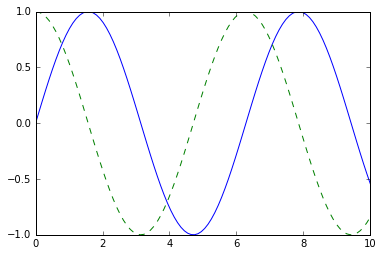

In [33]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

We used [`np.linespace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), to create our data `x`. In short 
> np.linespace(starting number, end number, number of data points)

## Two Plots in One Image

Brief idea of subplot

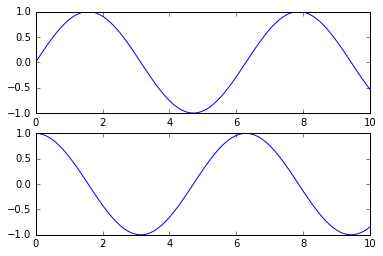

In [34]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

#### Object-oriented interface

in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects

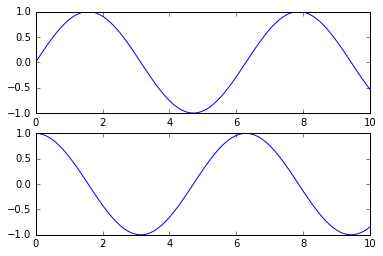

In [35]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Simple Line Plots

line plot of a single function $y = f(x)$.

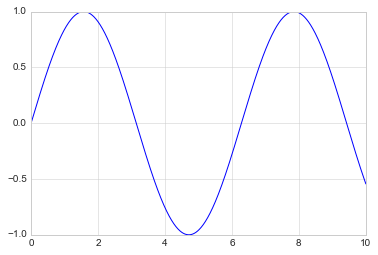

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

create a single figure with multiple lines, we can call the ``plot`` function multiple times:

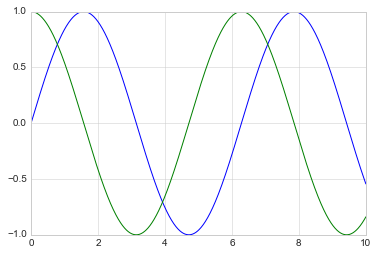

In [37]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Adjusting the Plot: Line Colors and Styles

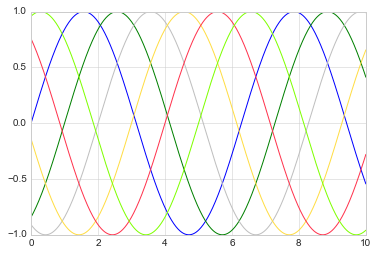

In [38]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

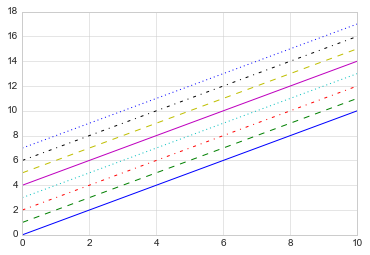

In [39]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

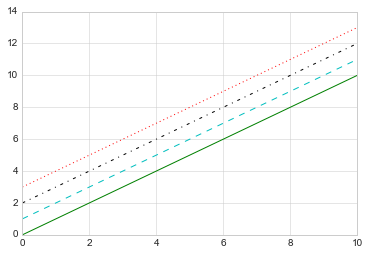

In [40]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

## Labeling Plots

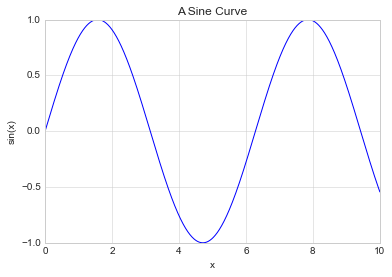

In [41]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

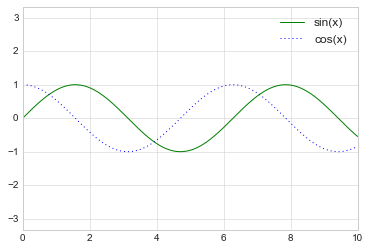

In [42]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Visualization with Seaborn

#### Multi Line Plot with Legend

In [43]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [44]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0) # create 6 array of number that adds up to 0

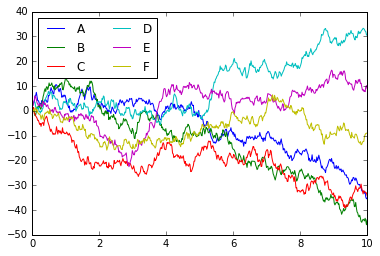

In [45]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

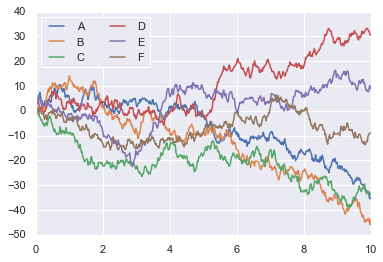

In [46]:
import seaborn as sns
sns.set() # using sns theme
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Pair plots
 *pair plots*. A quick visulization on the relationship between each columns in iris datas.

In [47]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


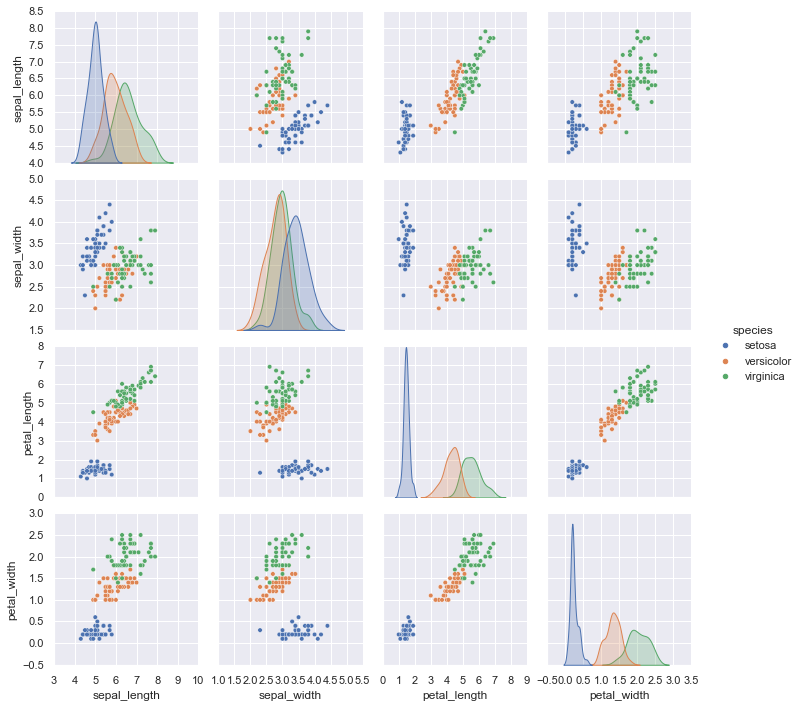

In [48]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

Create multiple plots with Facet. Below is a datasets of tips, we will analysis the percentage of tips custom give base on *sex* and *time*

In [49]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


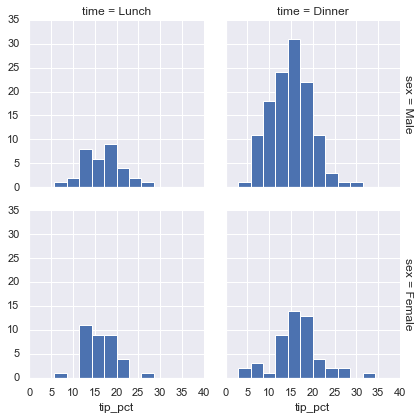

In [50]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Some quick boxplots

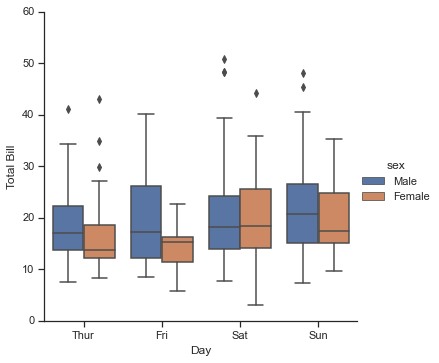

In [51]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

# Activity

##### Can you create a line plot with matplotlib or seaborn showing trend of the number of papers between 2000 and 2010 in MAG papers dataset? 
![solution1](https://raw.githubusercontent.com/SciSciSummerSchool/s4_lectures/master/1_introduction/images/01_03_activity1.png)

In [168]:
Papers = pd.read_csv("~/datasets/s4/MAG/Papers.csv")

# Display without scientific notation
ax = plt.axes()
ax.ticklabel_format(useOffset=False)

# code here
#
#
# 

### Advanced (optional)

##### Using matplotlib or seaborn, can you show the trend of citation numbers between 1950 and 2015 for different types of documents?
![solution2](https://raw.githubusercontent.com/SciSciSummerSchool/s4_lectures/master/1_introduction/images/01_03_activity2.png)

In [ ]:
Papers = pd.read_csv("~/datasets/s4/MAG/Papers.csv")

# Display without scientific notation
ax = plt.axes()
ax.ticklabel_format(useOffset=False)

# code here
#
#
# 

# Legend style
plt.legend(loc='upper left');